In [ ]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/merged_nhl_salary_performance - merged_nhl_salary_performance (1).csv')


In [8]:
df['Cap Hit'] = df['Cap Hit'].replace('[\$,]', '', regex=True).astype(float)
df['AAV'] = df['AAV'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
df['Points_per_Million'] = df['P'] / (df['AAV'] / 1_000_000)


In [10]:
df[['Player', 'Team', 'AAV', 'P', 'PPG', 'Points_per_Million']].sort_values(
    by='Points_per_Million', ascending=False
).head(15)

,Player,Team,AAV,P,PPG,Points_per_Million
562,Jonathan Drouin,COL,825000.0,56,0.71,67.878788
505,Wyatt Johnston,DAL,1000417.0,65,0.79,64.972906
383,Brandon Hagel,T.B,1500000.0,75,0.91,50.000000
661,Stefan Noesen,CAR,762500.0,37,0.46,48.524590
504,Seth Jarvis,CAR,1394167.0,67,0.83,48.057370
594,Luke Evangelista,NSH,825000.0,39,0.49,47.272727
453,Brock Faber,MIN,1008333.0,47,0.57,46.611586
603,Danton Heinen,BOS,775000.0,36,0.49,46.451613
556,Jake Neighbours,STL,835834.0,38,0.49,45.463573
662,Darren Raddysh,T.B,762500.0,33,0.40,43.278689


In [13]:
df_filtered = df[(df['GP_perf'] >= 20) & (df['Position'].isin(['C', 'L', 'R']))]


df_filtered[['Player', 'Team', 'AAV', 'P', 'PPG', 'Points_per_Million']].sort_values(
    by='Points_per_Million', ascending=True
).head(15)


,Player,Team,AAV,P,PPG,Points_per_Million
439,Rasmus Kupari,WPG,1000000.0,1,0.04,1.000000
309,Brock McGinn,ANA,2750000.0,3,0.13,1.090909
156,Jakub Vrana,STL,5250000.0,6,0.29,1.142857
511,Alex Turcotte,L.A,2444167.0,4,0.20,1.636549
194,Kevin Labanc,S.J,4725000.0,9,0.20,1.904762
207,Christian Dvorak,MTL,4450000.0,9,0.30,2.022472
372,Nicolas Deslauriers,PHI,1750000.0,4,0.07,2.285714
648,Adam Erne,EDM,775000.0,2,0.08,2.580645
133,Trevor Zegras,ANA,5750000.0,15,0.48,2.608696
426,Steven Lorentz,FLA,1050000.0,3,0.08,2.857143


In [15]:
df_filtered.loc[:, 'xGF_percent_per_million'] = df_filtered['xGF%'] / (df_filtered['AAV'] / 1_000_000)


In [16]:
top_xgf_value = df_filtered[['Player', 'Team', 'xGF%', 'AAV', 'xGF_percent_per_million']].sort_values(
    by='xGF_percent_per_million', ascending=False
).head(15)


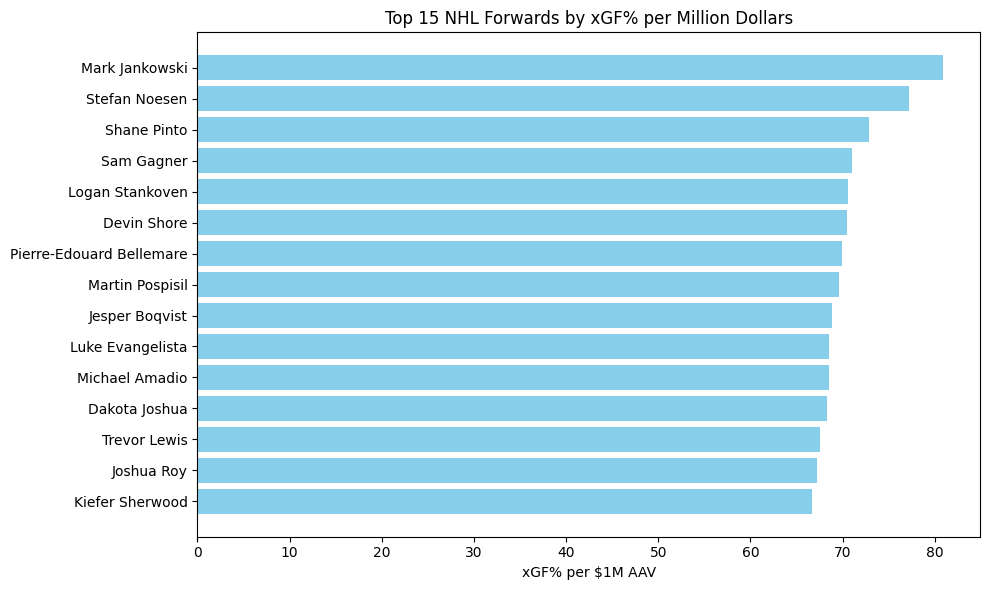

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Bar plot
plt.barh(top_xgf_value['Player'], top_xgf_value['xGF_percent_per_million'], color='skyblue')
plt.xlabel('xGF% per $1M AAV')
plt.title('Top 15 NHL Forwards by xGF% per Million Dollars')
plt.gca().invert_yaxis()  # Highest value at top
plt.tight_layout()
plt.show()


In [18]:
# Step 1: Filter for realistic trade/FA targets
trade_targets = df[
    (df['Position'].isin(['C', 'L', 'R'])) &
    (df['GP_perf'] >= 30) &
    (df['TOI/GP'] >= 8) &
    (df['AAV'] <= 4_000_000)
].copy()

# Step 2: Create value metrics if not already done
trade_targets['Points_per_Million'] = trade_targets['P'] / (trade_targets['AAV'] / 1_000_000)
trade_targets['xGF_percent_per_million'] = trade_targets['xGF%'] / (trade_targets['AAV'] / 1_000_000)

# Step 3: Sort by combo of value metrics
trade_targets = trade_targets.sort_values(
    by=['Points_per_Million', 'xGF_percent_per_million'],
    ascending=[False, False]
)

# Step 4: Preview top 20 trade/free agency value forwards
trade_targets[['Player', 'Team', 'Position', 'AAV', 'P', 'PPG', 'xGF%', 'Points_per_Million', 'xGF_percent_per_million']].head(20)


,Player,Team,Position,AAV,P,PPG,xGF%,Points_per_Million,xGF_percent_per_million
562,Jonathan Drouin,COL,L,825000.0,56,0.71,54.94,67.878788,66.593939
505,Wyatt Johnston,DAL,C,1000417.0,65,0.79,58.47,64.972906,58.445628
383,Brandon Hagel,T.B,L,1500000.0,75,0.91,53.76,50.000000,35.840000
661,Stefan Noesen,CAR,R,762500.0,37,0.46,58.90,48.524590,77.245902
504,Seth Jarvis,CAR,C,1394167.0,67,0.83,57.78,48.057370,41.444102
594,Luke Evangelista,NSH,R,825000.0,39,0.49,56.54,47.272727,68.533333
603,Danton Heinen,BOS,L,775000.0,36,0.49,48.47,46.451613,62.541935
556,Jake Neighbours,STL,L,835834.0,38,0.49,41.91,45.463573,50.141535
563,Dakota Joshua,VAN,C,825000.0,32,0.51,56.39,38.787879,68.351515
528,Tyson Foerster,PHI,R,863334.0,33,0.43,55.23,38.223909,63.972924


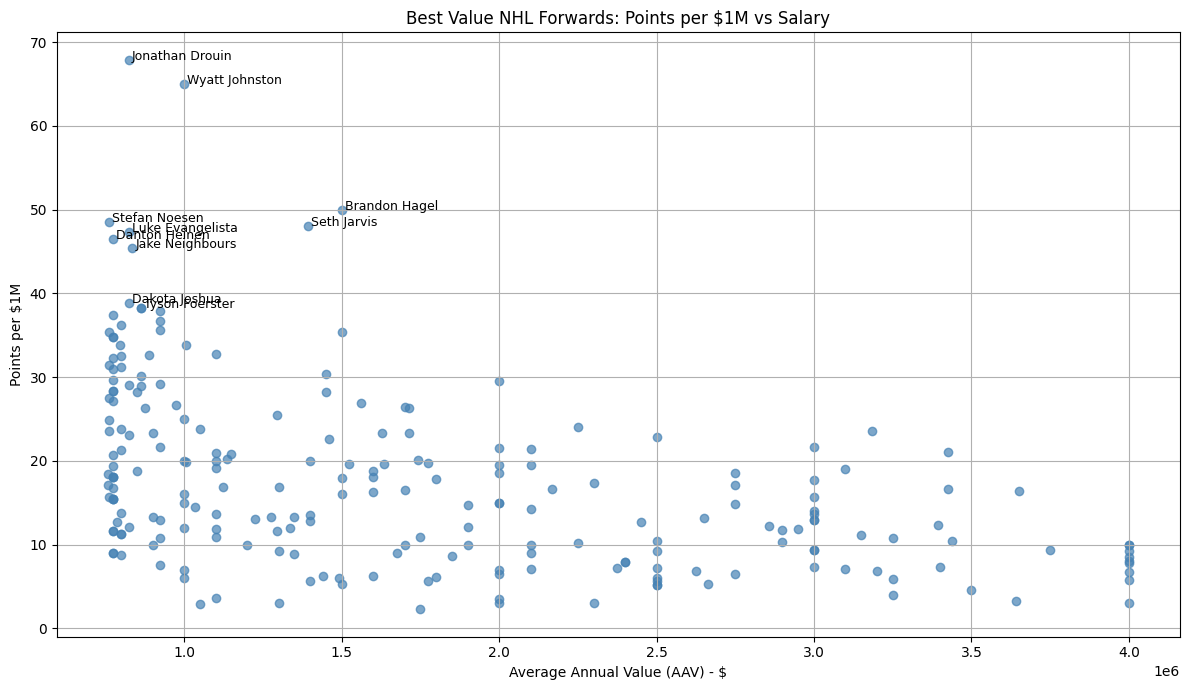

In [46]:
# Optional: Filter further if you want clarity
plot_df = trade_targets[trade_targets['Points_per_Million'].notna()].copy()

# Create scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(plot_df['AAV'], plot_df['Points_per_Million'], alpha=0.7, color='steelblue')

# Add labels for top 10
top_labels = plot_df.sort_values(by='Points_per_Million', ascending=False).head(10)
for _, row in top_labels.iterrows():
    plt.text(row['AAV'] + 10000, row['Points_per_Million'], row['Player'], fontsize=9)

# Plot aesthetics
plt.xlabel('Average Annual Value (AAV) - $')
plt.ylabel('Points per $1M')
plt.title('Best Value NHL Forwards: Points per $1M vs Salary')
plt.grid(True)
plt.tight_layout()
plt.savefig('points_per_million_plot.png')  # after your xGF% per $1M plot
plt.show()


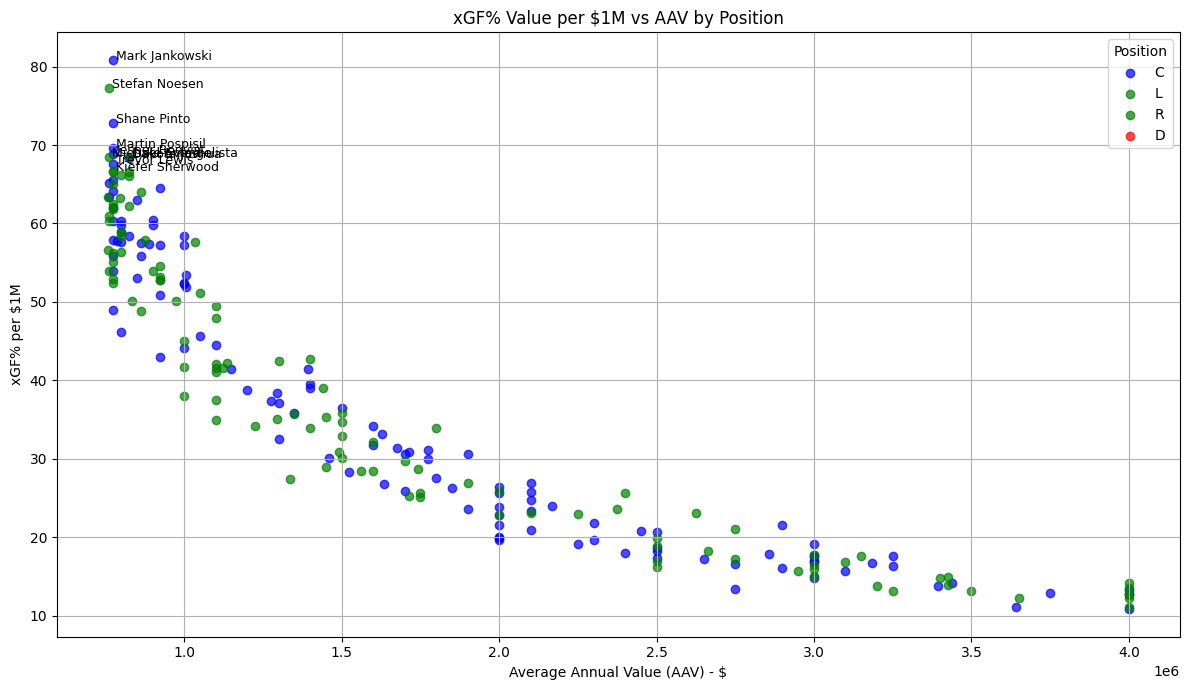

In [45]:
# Filter for usable rows
plot_df = trade_targets[trade_targets['xGF_percent_per_million'].notna()].copy()

# Step 1: Define color mapping by position
position_colors = {
    'C': 'blue',      # Centers
    'L': 'green',     # Left wings
    'R': 'green',     # Right wings
    'D': 'red'        # Defense
}

# Step 2: Plot
plt.figure(figsize=(12, 7))

# Plot each position group separately for color control
for pos in ['C', 'L', 'R', 'D']:
    subset = plot_df[plot_df['Position'] == pos]
    plt.scatter(subset['AAV'], subset['xGF_percent_per_million'],
                label=pos, color=position_colors[pos], alpha=0.7)

# Step 3: Add labels for top xGF value players
top_labels = plot_df.sort_values(by='xGF_percent_per_million', ascending=False).head(10)
for _, row in top_labels.iterrows():
    plt.text(row['AAV'] + 10000, row['xGF_percent_per_million'], row['Player'], fontsize=9)

# Step 4: Final touches
plt.xlabel('Average Annual Value (AAV) - $')
plt.ylabel('xGF% per $1M')
plt.title('xGF% Value per $1M vs AAV by Position')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.savefig('xgf_per_million_plot.png')  # after your xGF% per $1M plot
plt.show()






In [33]:
df = pd.read_csv('Team_Stats - games.csv')

In [34]:
df['Win%'] = df['W'] / (df['W'] + df['L'] + df['OTL'])


In [35]:
df = df[['Team', 'xGF%', 'Win%']]


In [37]:
correlation_matrix = df[['xGF%', 'Win%']].corr()
print(correlation_matrix)



          xGF%      Win%
xGF%  1.000000  0.728118
Win%  0.728118  1.000000


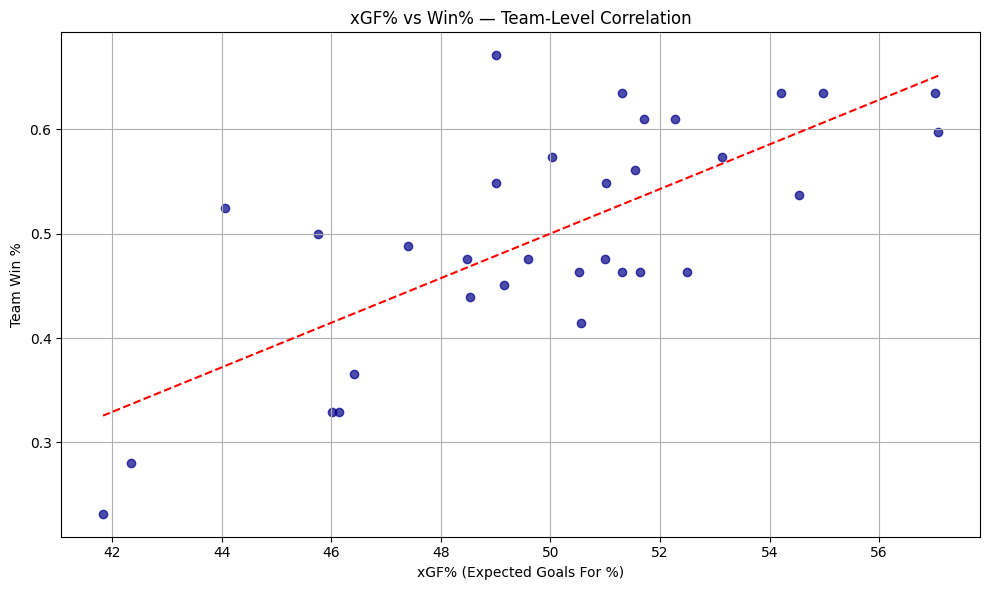

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your team-level DataFrame is called 'df' and contains 'xGF%' and 'Win%'
plt.figure(figsize=(10, 6))
plt.scatter(df['xGF%'], df['Win%'], alpha=0.7, color='darkblue')

# Fit and plot regression line
m, b = np.polyfit(df['xGF%'], df['Win%'], 1)
plt.plot(df['xGF%'], m * df['xGF%'] + b, color='red', linestyle='--')



# Plot labels
plt.xlabel('xGF% (Expected Goals For %)')
plt.ylabel('Team Win %')
plt.title('xGF% vs Win% — Team-Level Correlation')
plt.grid(True)
plt.tight_layout()

# Save and show

plt.savefig('xgf_vs_win_correlation.png')
plt.show()


,Player,Team,Position,AAV,P,PPG,xGF%,Points_per_Million,xGF_percent_per_million
562,Jonathan Drouin,COL,L,825000.0,56,0.71,54.94,67.878788,66.593939
505,Wyatt Johnston,DAL,C,1000417.0,65,0.79,58.47,64.972906,58.445628
383,Brandon Hagel,T.B,L,1500000.0,75,0.91,53.76,50.000000,35.840000
661,Stefan Noesen,CAR,R,762500.0,37,0.46,58.90,48.524590,77.245902
504,Seth Jarvis,CAR,C,1394167.0,67,0.83,57.78,48.057370,41.444102
594,Luke Evangelista,NSH,R,825000.0,39,0.49,56.54,47.272727,68.533333
603,Danton Heinen,BOS,L,775000.0,36,0.49,48.47,46.451613,62.541935
556,Jake Neighbours,STL,L,835834.0,38,0.49,41.91,45.463573,50.141535
563,Dakota Joshua,VAN,C,825000.0,32,0.51,56.39,38.787879,68.351515
528,Tyson Foerster,PHI,R,863334.0,33,0.43,55.23,38.223909,63.972924


In [39]:
top_targets.to_csv("final_value_targets.csv", index=False)


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to work with
value_df = trade_targets.copy()

# Initialize scaler and fit on both metrics
scaler = MinMaxScaler()
value_df[['Scaled_PPM', 'Scaled_xGF']] = scaler.fit_transform(
    value_df[['Points_per_Million', 'xGF_percent_per_million']]
)

# Create combined ValueScore (equal weight)
value_df['ValueScore'] = value_df['Scaled_PPM'] + value_df['Scaled_xGF']

# Sort by best value
top_value_targets = value_df.sort_values(by='ValueScore', ascending=False).head(15)

# Preview
top_value_targets[['Player', 'Team', 'AAV', 'P', 'PPG', 'xGF%', 'Points_per_Million', 'xGF_percent_per_million', 'ValueScore']]

# Save top 15 value targets to CSV
top_15_value = top_value_targets.head(15)
top_15_value.to_csv('top_15_value_targets.csv', index=False)



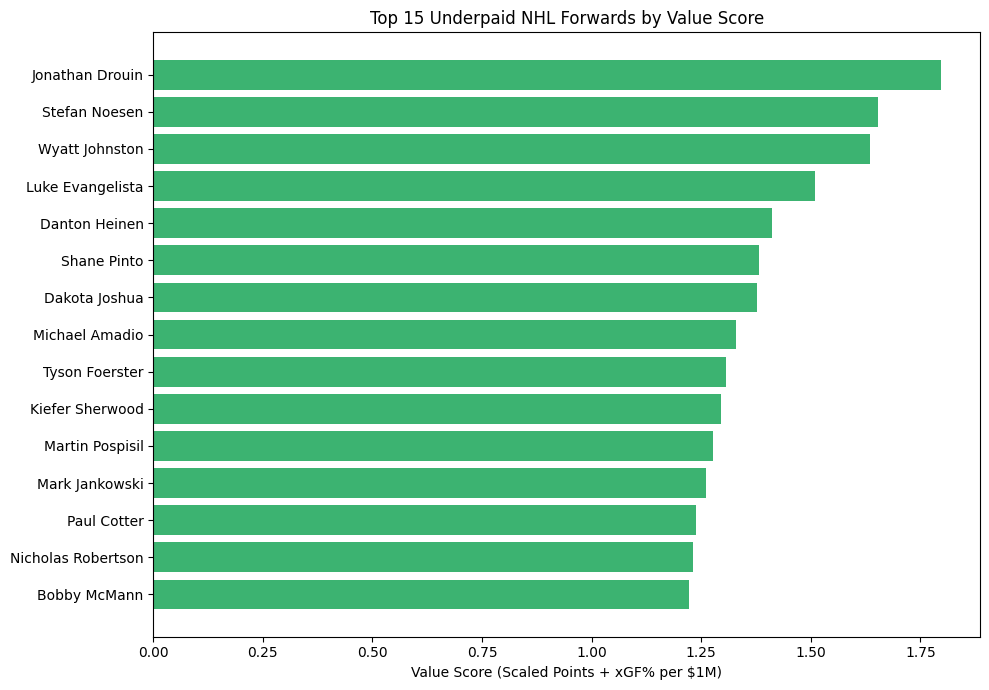

In [54]:
import matplotlib.pyplot as plt

# Bar plot of top 15 by ValueScore
top_15_value = top_value_targets.head(15)

plt.figure(figsize=(10, 7))
plt.barh(top_15_value['Player'], top_15_value['ValueScore'], color='mediumseagreen')
plt.xlabel('Value Score (Scaled Points + xGF% per $1M)')
plt.title('Top 15 Underpaid NHL Forwards by Value Score')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.savefig('value_score_bar_plot.png')
plt.show()
